In [1]:
#|default_exp resample_img

# Resampling hyperspectral data

In [2]:
#|hide
from nbdev.showdoc import *

In [3]:
#|hide
#|export

import numpy as np
import pandas as pd
from spectral import BandResampler
import matplotlib.pyplot as plt


from hyperspectral_tools import const_vals as CONST

In [14]:
#|export

class Resample():

  def __init__(self,
               path_to_spectrum : str , #Path to a CSV file containing spectral bands as float values stored as strings. Ensure that only columns with spectral data have digit-only names strings.
               bands_center : list , # list of band center of specific sensor
               fwhm : list , # 
               ):
          
          #read the dataframe
          init_df = pd.read_csv(path_to_spectrum)
          # filter to get only spectral data and change columns type to numeric
          df = init_df.loc[:, init_df.columns[init_df.columns.str.isdigit()]]
          df.columns=pd.to_numeric(df.columns)
          self.df = df
          #save the non spectral data
          self.non_spectral_data =init_df.loc[:, init_df.columns[~init_df.columns.str.isdigit()]]

          #spectrum lists
          self.center_bands = bands_center
          self.fwhm = fwhm

          # Call resample_data method 
          self.resampled_df = self.resample_data()

          # Merge the non spectral data with spectral data
          self.resampled_final = self.merge_resample_with_original_data()


  def resample_data(self):
      resampler = BandResampler(self.df.columns.tolist(), 
                                   self.center_bands, 
                                   fwhm1=None, 
                                   fwhm2=self.fwhm)
      collect_res=[]
      for index,row in self.df.iterrows():
           tmp=self.df.iloc[index].values
           resampled_res=resampler(tmp)
           collect_res.append(resampled_res)

      self.resampled_data=pd.DataFrame(collect_res,columns=self.center_bands)

      return self.resampled_data
  
  def merge_resample_with_original_data(self):
       self.df_resampled_final =pd.concat([self.non_spectral_data,self.resampled_df],axis=1)

       return self.df_resampled_final
           
  



In [16]:
instance = Resample(path_to_spectrum = "data\original\processesed\cleansamples_209.csv",
                    bands_center = CONST.s2_center_sen,
                    fwhm = CONST.s2_fwhm_sen
                    )

test=instance.resampled_final
# test.dtypes

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\USER\AppData\Local\Temp\ipykernel_21684\4227796831.py:1: SyntaxWarning: invalid escape sequence '\o'
  instance = Resample(path_to_spectrum = "data\original\processesed\cleansamples_209.csv",


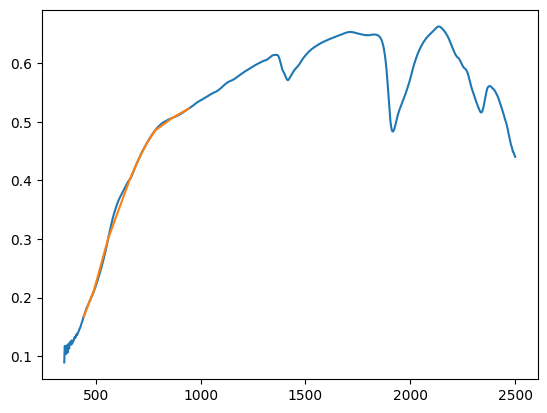

In [29]:
# Plot the data from test.iloc[0, 8:]


# Plot the data from instance.df.iloc[0]
plt.plot(instance.df.iloc[0], label='instance')

plt.plot(test.iloc[0, 8:], label='test')

In [ ]:
#resampler_ven=BandResampler(df.columns.tolist(), center_ven, fwhm1=None, fwhm2=fwhm_ven)